import library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

melakukan import dataset

In [43]:
df = pd.read_excel('dataset_penjualan.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID transaksi  150 non-null    object
 1   beras         150 non-null    int64 
 2   telur         150 non-null    int64 
 3   tepung        150 non-null    int64 
 4   migor         150 non-null    int64 
 5   gula          150 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.2+ KB


C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [44]:
df.drop(columns=['ID transaksi'], inplace=True)
df.head()

,beras,telur,tepung,migor,gula
0,1,1,0,0,0
1,1,0,1,1,0
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,0,0


cek data hilang

In [45]:
missing_data = df.isnull().sum()
print('\nJumlah data yang hilang per kolom')
print(missing_data[missing_data > 0])

if df.isnull().values.any():
    print('\nAda data yang hilang')
else:
    print('\nTidak ada data yang hilang')


Jumlah data yang hilang per kolom
Series([], dtype: int64)

Tidak ada data yang hilang


implementasi algoritma apriori

In [46]:


# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Define a function to style the table
def style_table(df):
    return df.style.set_properties(**{'background-color': 'lightblue', 'color': 'black'}) \
                   .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}]) \
                   .set_caption("Styled Table")

# Apply the style to the frequent itemsets and rules
styled_frequent_itemsets = style_table(frequent_itemsets)
styled_rules = style_table(rules)

# Display the styled tables
styled_frequent_itemsets
styled_rules

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'telur'}),frozenset({'beras'}),0.580000,0.740000,0.446667,0.770115,1.040696,0.017467,1.131000,0.093106
1,frozenset({'beras'}),frozenset({'telur'}),0.740000,0.580000,0.446667,0.603604,1.040696,0.017467,1.059545,0.150402
2,frozenset({'beras'}),frozenset({'tepung'}),0.740000,0.466667,0.326667,0.441441,0.945946,-0.018667,0.954839,-0.180180
3,frozenset({'tepung'}),frozenset({'beras'}),0.466667,0.740000,0.326667,0.700000,0.945946,-0.018667,0.866667,-0.096774
4,frozenset({'migor'}),frozenset({'beras'}),0.546667,0.740000,0.366667,0.670732,0.906394,-0.037867,0.789630,-0.185540
5,frozenset({'beras'}),frozenset({'migor'}),0.740000,0.546667,0.366667,0.495495,0.906394,-0.037867,0.898571,-0.284284
6,frozenset({'gula'}),frozenset({'beras'}),0.566667,0.740000,0.393333,0.694118,0.937997,-0.026000,0.850000,-0.132353
7,frozenset({'beras'}),frozenset({'gula'}),0.740000,0.566667,0.393333,0.531532,0.937997,-0.026000,0.925000,-0.202703
8,frozenset({'telur'}),frozenset({'tepung'}),0.580000,0.466667,0.213333,0.367816,0.788177,-0.057333,0.843636,-0.390200
9,frozenset({'tepung'}),frozenset({'telur'}),0.466667,0.580000,0.213333,0.457143,0.788177,-0.057333,0.773684,-0.335065


C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_9412\1541081942.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets.reset_index(), palette='viridis')


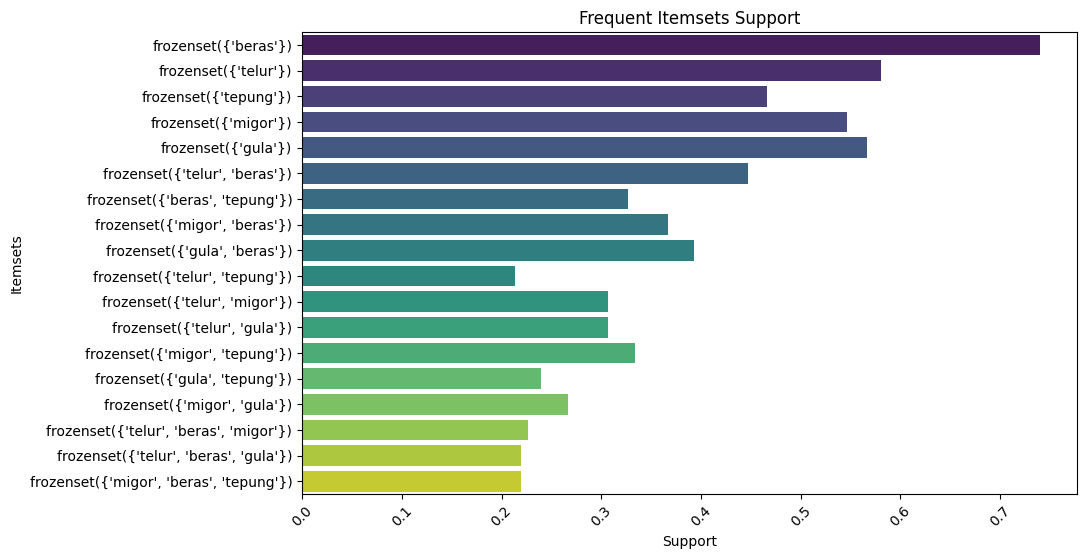

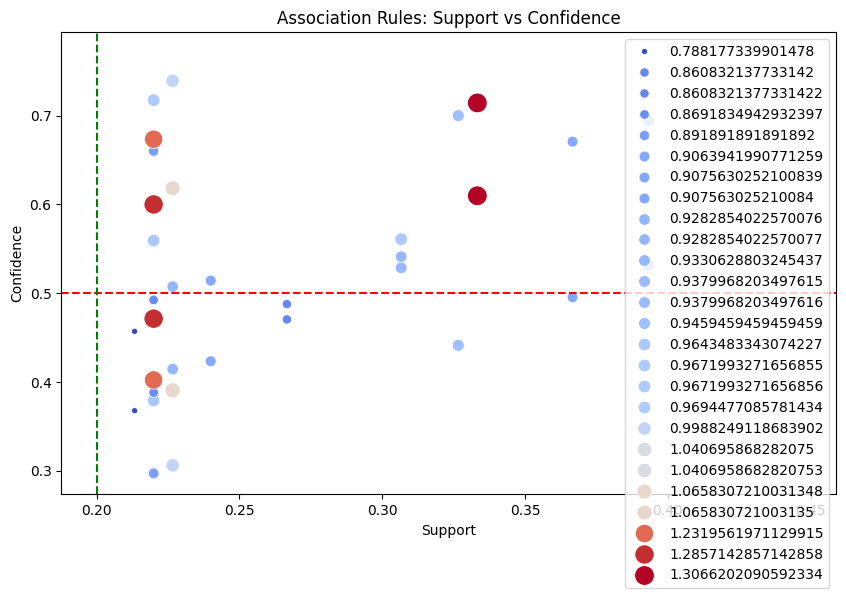

In [47]:

import seaborn as sns


# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Visualize Frequent Itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.reset_index(), palette='viridis')
plt.title('Frequent Itemsets Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.show()

# Visualize Association Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='coolwarm', legend='full')
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.axhline(y=0.5, color='r', linestyle='--')  # Threshold line for confidence
plt.axvline(x=0.2, color='g', linestyle='--')  # Threshold line for support
plt.legend(loc='upper right')
plt.show()

 Grafik Frequent Item
 
menampilkan grafik horizontal yang menunjukkan tingkat support untuk berbagai itemset yang sering muncul. Itemset dalam grafik ini merepresentasikan kombinasi item seperti "beras," "telur," "tepung," "gula," dan "migor."

Support mengukur seberapa sering item atau kombinasi item tersebut muncul dalam dataset. Item dengan support tertinggi adalah "beras," diikuti oleh "telur," "tepung," dan "migor." Kombinasi seperti {telur, beras} atau {beras, tepung} juga memiliki tingkat support yang cukup tinggi, menunjukkan bahwa kombinasi tersebut sering dibeli bersama.

Secara umum, grafik ini memberikan wawasan tentang pola pembelian barang, yang dapat dimanfaatkan untuk pengelolaan stok atau strategi promosi di toko.

contoh kasus pada grafik dimana kombinasi telur dan beras memiliki 40% untuk dibeli

grafik assosiasi rules 

menunjukkan hubungan antara support (frekuensi kombinasi item muncul) dan confidence (kemungkinan item dibeli bersama). Kombinasi terbaik ditunjukkan oleh titik di bagian kanan atas grafik karena memiliki support dan confidence yang tinggi, menandakan bahwa kombinasi tersebut sering terjadi dan hubungannya kuat. Garis hijau vertikal menunjukkan batas minimal support, sehingga aturan di sebelah kanan garis ini dianggap signifikan. Sementara itu, garis merah horizontal menunjukkan batas minimal confidence, sehingga aturan di atas garis ini dianggap relevan. Titik berwarna merah menandakan aturan dengan hubungan sangat kuat, ditunjukkan oleh nilai lift yang tinggi. Secara keseluruhan, aturan yang berada di kanan atas grafik dengan warna merah paling potensial untuk digunakan dalam strategi bisnis, seperti membuat promo atau menata barang di toko.

implementasi algoritma fp-growth

In [48]:


# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

# Define a function to style the table
def style_table(df, title):
    return df.style.set_properties(**{'background-color': 'lightblue', 'color': 'black'}) \
                   .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}]) \
                   .set_caption(title)

# Set float format for better display
pd.options.display.float_format = '{:.2f}'.format

# Apply the style to the frequent itemsets and rules
styled_frequent_itemsets_fp = style_table(frequent_itemsets_fp, "Frequent Itemsets (FP-Growth)")
styled_rules_fp = style_table(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']], "Association Rules (FP-Growth)")

# Display the styled tables
styled_frequent_itemsets_fp
styled_rules_fp

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,frozenset({'telur'}),frozenset({'beras'}),0.446667,0.770115,1.040696
1,"frozenset({'telur', 'migor'})",frozenset({'beras'}),0.226667,0.739130,0.998825
2,frozenset({'tepung'}),frozenset({'migor'}),0.333333,0.714286,1.306620
3,frozenset({'tepung'}),frozenset({'beras'}),0.326667,0.700000,0.945946
4,"frozenset({'telur', 'gula'})",frozenset({'beras'}),0.220000,0.717391,0.969448


C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_9412\3913241715.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(10), palette='viridis')


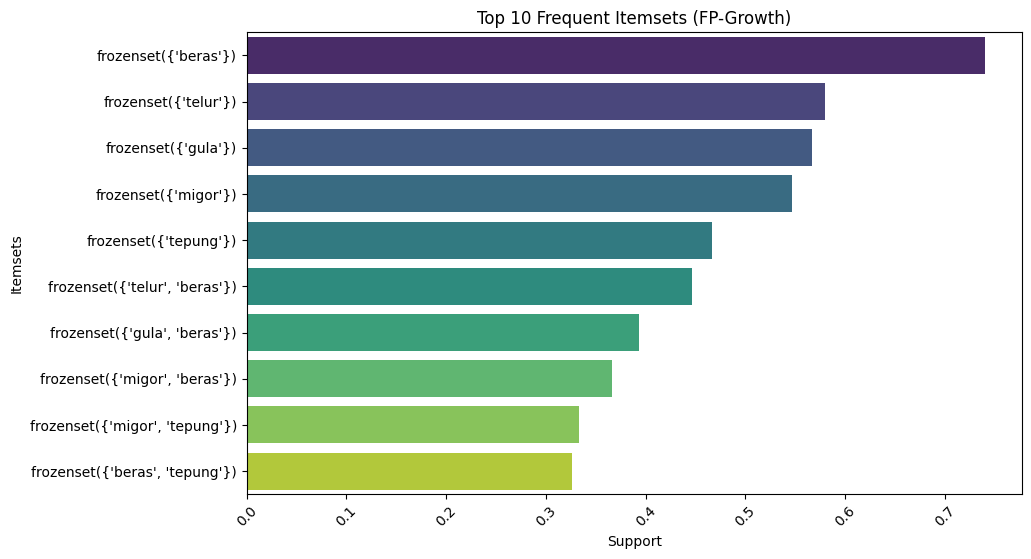

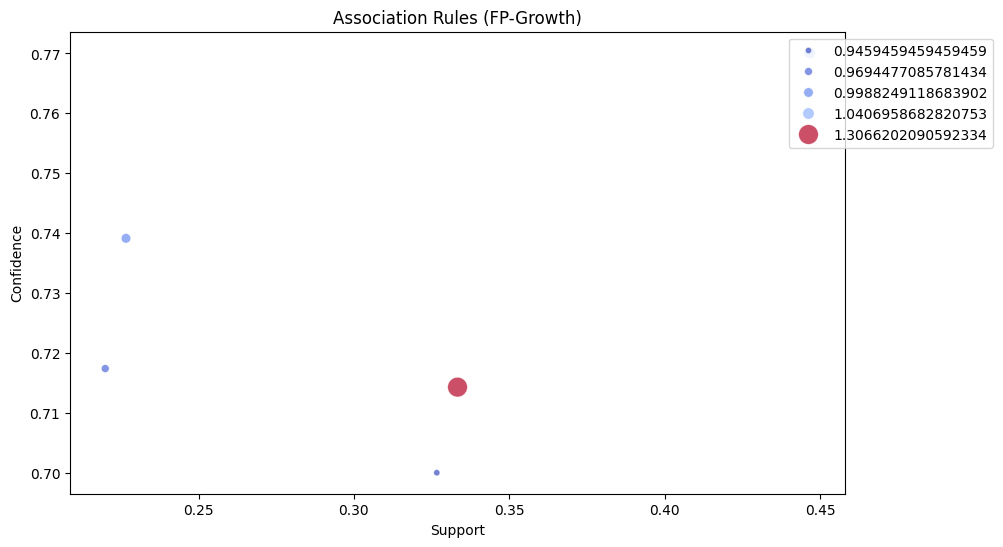

In [49]:

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

# Define a function to style the table
def style_table(df, title):
    return df.style.set_properties(**{'background-color': 'lightblue', 'color': 'black'}) \
                   .set_table_styles([{'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}]) \
                   .set_caption(title)

# Set float format for better display
pd.options.display.float_format = '{:.2f}'.format

# Apply the style to the frequent itemsets and rules
styled_frequent_itemsets_fp = style_table(frequent_itemsets_fp, "Frequent Itemsets (FP-Growth)")
styled_rules_fp = style_table(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']], "Association Rules (FP-Growth)")

# Display the styled tables
styled_frequent_itemsets_fp
styled_rules_fp

# Plotting Frequent Itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.show()

# Plotting Association Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_fp, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='coolwarm', alpha=0.7)
plt.title('Association Rules (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_9412\3669725230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(10), palette='viridis

Text(0, 0.5, 'Itemsets')

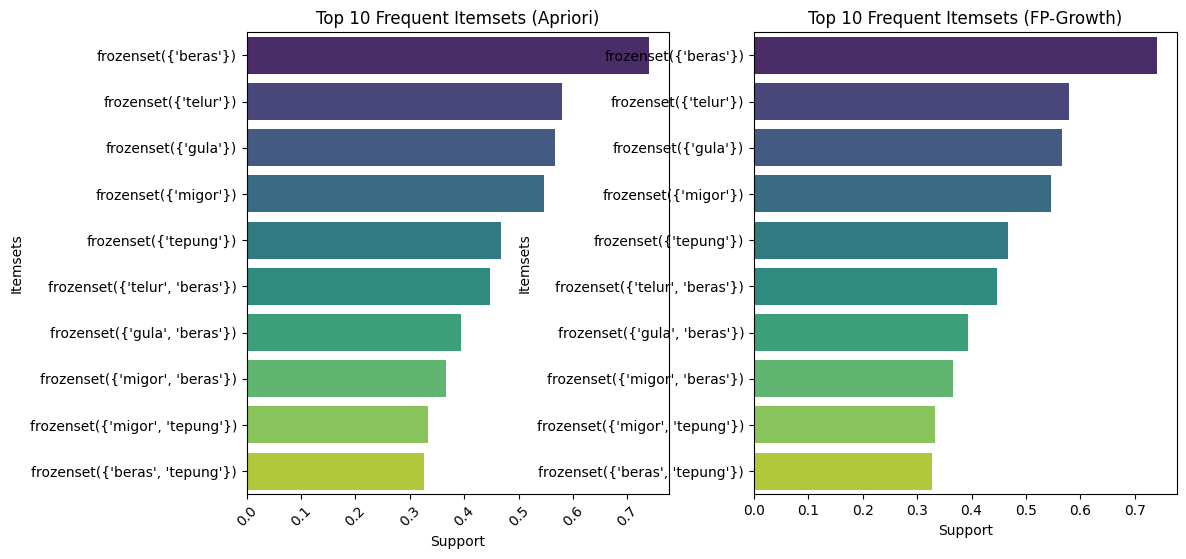

In [50]:


# Generate frequent itemsets using Apriori
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Plotting Frequent Itemsets Comparison
plt.figure(figsize=(12, 6))

# Plot for Apriori
plt.subplot(1, 2, 1)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Frequent Itemsets (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)

# Plot for FP-Growth
plt.subplot(1, 2, 2)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_9412\907146450.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(15), palette='Blues_d'

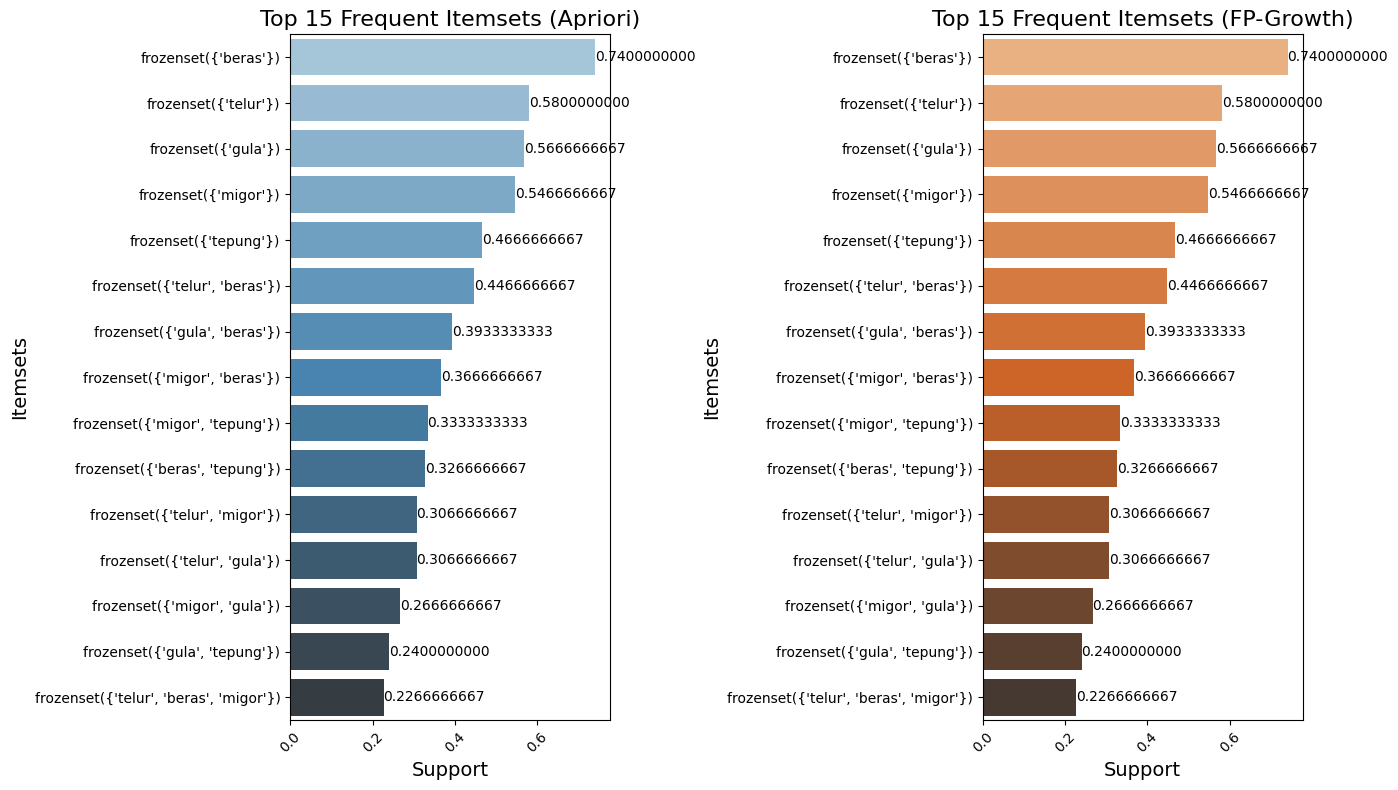

In [51]:


# Generate frequent itemsets using Apriori
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot for Apriori
plt.subplot(1, 2, 1)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values('support', ascending=False).head(15), palette='Blues_d')
plt.title('Top 15 Frequent Itemsets (Apriori)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(frequent_itemsets_apriori.sort_values('support', ascending=False).head(15)['support']):
    plt.text(value, index, f'{value:.10f}', color='black', ha="left", va="center")

# Plot for FP-Growth
plt.subplot(1, 2, 2)
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_fp.sort_values('support', ascending=False).head(15), palette='Oranges_d')
plt.title('Top 15 Frequent Itemsets (FP-Growth)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Itemsets', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(frequent_itemsets_fp.sort_values('support', ascending=False).head(15)['support']):
    plt.text(value, index, f'{value:.10f}', color='black', ha="left", va="center")

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


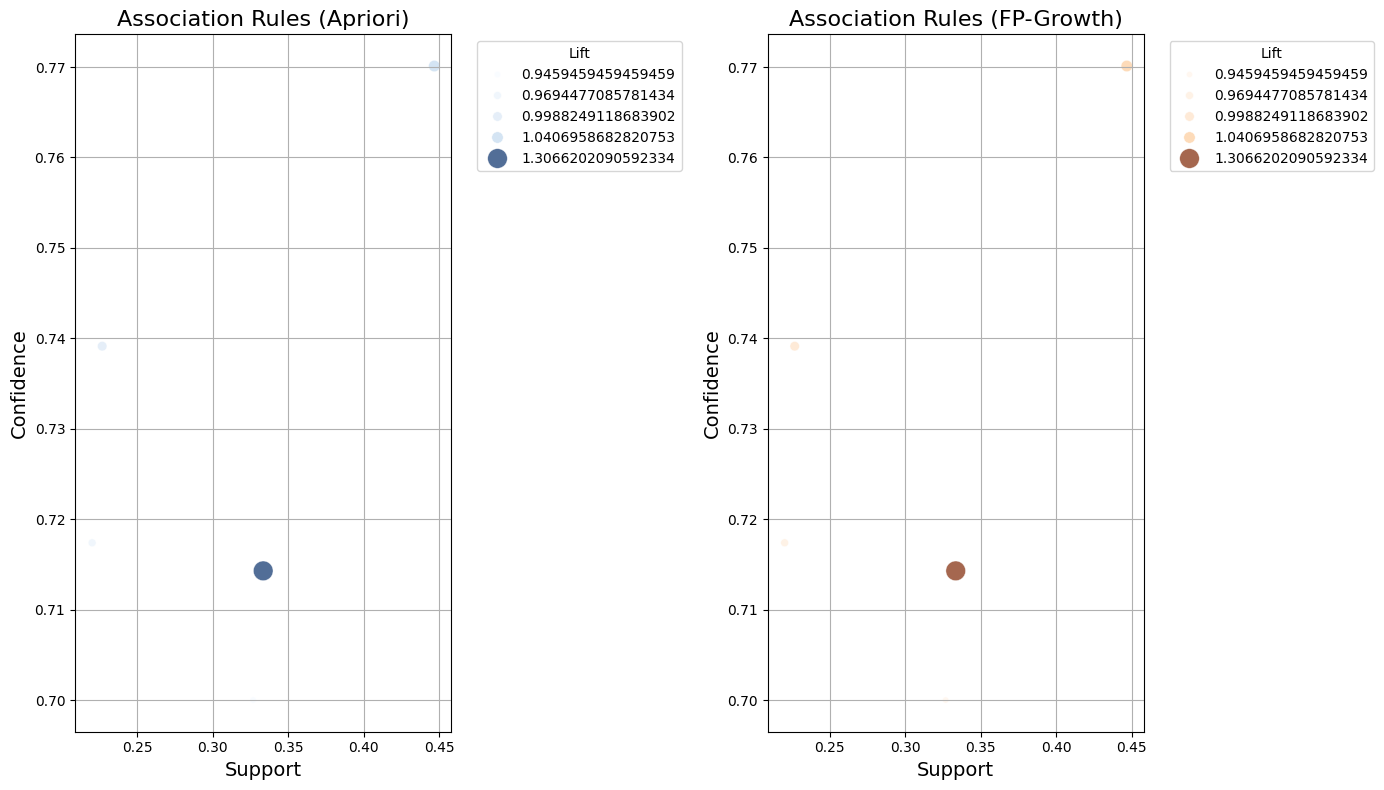

In [52]:


# Generate frequent itemsets using Apriori
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.7)

# Generate frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(df, min_support=0.2, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot untuk Apriori
plt.subplot(1, 2, 1)
sns.scatterplot(data=rules_apriori, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='Blues', alpha=0.7)
plt.title('Association Rules (Apriori)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Plot untuk FP-Growth
plt.subplot(1, 2, 2)
sns.scatterplot(data=rules_fp, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='Oranges', alpha=0.7)
plt.title('Association Rules (FP-Growth)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()